In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)

In [2]:
df_people = pd.read_csv('data/new_people.csv',encoding='cp949')
df_process = pd.read_csv('data/process.csv',low_memory=False)
df_suggest = pd.read_csv('data/suggest.csv')

In [3]:
pp = df_people.copy()
pc = df_process.copy()
sg = df_suggest.copy()

In [4]:
# 정희용 의원 생년월일만 빠져있어서 채워주었습니다.
pp.loc[pp['BIRTH'] == '    년   월   일' , 'BIRTH'] = '1976년 10월 01일'

In [5]:
pp['year'] = pp['DAESU'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

sg['year'] = sg['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

pc['year'] = pc['AGE'].replace({1:'1대(1948~1950)', 2:'2대(1950~1954)', 3:'3대(1954~1958)', 4:'4대(1958~1960)', 5:'5대(1960~1963)',
                        6:'6대(1963~1967)', 7:'7대(1967~1971)', 8:'8대(1971~1972)', 9:'9대(1973~1979)', 10:'10대(1979~1980)',
                        11:'11대(1981~1985)', 12:'12대(1985~1988)', 13:'13대(1988~1992)', 14:'14대(1992~1996)', 15:'15대(1996~2000)',
                        16:'16대(2000~2004)', 17:'17대(2004~2008)', 18:'18대(2008~2012)', 19:'19대(2012~2016)', 20:'20대(2016~2020)',
                        21:'21대(2020~2024)'})

In [6]:
list_dae = pc.AGE.unique().tolist()

In [7]:
# 데이터를 대 수 별로 21개씩 분할

# pp_dae1 ,pp_dae2 ....
for i in list_dae:
    globals()['pp_dae'+str(i)] = pp[pp.DAESU == i]

# pc_dae1 ,pc_dae2 ....
for i in list_dae:
    globals()['pc_dae'+str(i)] = pc[pc.AGE == i]

# sg_dae1, sg_dae2 ...
for i in list_dae:
    globals()['sg_dae'+str(i)] = sg[sg.AGE == i]

In [8]:
# 대 수 별 국회의원 나이 list 함수 (pp)

def minmaxage(dataframe):
    dataframe = dataframe.reset_index(drop=True)
    agelist=[]
    agelist2=[]
    st = int(dataframe.year[0].replace('(','~').replace(')','~').split('~')[1])
    for i in range(len(dataframe)):
        byear = int(dataframe.BIRTH[i][:4])
        agelist.append(st-byear)
    
    maxage = max(agelist); a=agelist.index(maxage)
    maxname = dataframe.loc[a,'NAME']
    agelist2.append([maxname,maxage])
    
    minage = min(agelist); b=agelist.index(minage)
    minname = dataframe.loc[b,'NAME']
    agelist2.append([minname,minage])
    
    avgage = round(sum(agelist)/len(agelist))
    agelist2.append(['평균나이',avgage])
    
    
    return agelist2

In [9]:
# 대 수 별 나이 특징 하나의 데이터프레임으로 만들기

ppdae_list=[pp_dae1,pp_dae2,pp_dae3,pp_dae4,pp_dae5,pp_dae6,pp_dae7,pp_dae8,pp_dae9,pp_dae10,
          pp_dae11,pp_dae12,pp_dae13,pp_dae14,pp_dae15,pp_dae16,pp_dae17,pp_dae18,pp_dae19,pp_dae20,pp_dae21]

allage=[]
for i in ppdae_list:
    agelist = minmaxage(i)
    allage.append(agelist)

list_dae2 = pp['year'].unique().tolist()
list_dae2.reverse()

allage_mean=[]
allage_max=[]
allage_min=[]
allage_maxname=[]
allage_minname=[]

for i in range(21):
    allage_mean.append(allage[i][2][1])
    allage_max.append(allage[i][0][1])
    allage_min.append(allage[i][1][1])
    allage_maxname.append(allage[i][0][0])
    allage_minname.append(allage[i][1][0])

df_age = pd.DataFrame()
df_age['대'] = list_dae2
df_age['평균나이'] = allage_mean
df_age['최고령의원이름'] = allage_maxname
df_age['최고령나이'] = allage_max
df_age['최연소의원이름'] = allage_minname
df_age['최연소나이'] = allage_min


In [10]:
# 대 별 법안 발의 top5 함수  (sg)

def lawcount_top5(dataframe):
    a = dataframe['RST_PROPOSER'].value_counts().head(5).index.tolist()
    b = dataframe['RST_PROPOSER'].value_counts().head(5).values.tolist()
    return a+b

In [11]:
#대 별 법안 발의안 개수 함수 (sg)

def lawcount_dae(dataframe):
    a = dataframe['year'].value_counts().values
    return int(a)

In [12]:
# 발의법의안 처리 상태 piechart 함수 (pc)
def lawpie(dataframe):
    pie_ratio = dataframe['PROC_RESULT_CD'].value_counts().values.tolist()
    pie_labels = dataframe['PROC_RESULT_CD'].value_counts().index.tolist()
    plt.figure(figsize=(15,10))
    pie = plt.pie(pie_ratio, autopct='%.1f%%', startangle=90,textprops={'fontsize': 18})
    plt.title('발의법의안 처리 상태', fontsize=20)
    plt.legend(pie_labels,bbox_to_anchor=(1.2, 1.0),loc='upper right',fontsize=12)

In [13]:
# 대 수별 위원회 별 법안 발의 수 함수(sg)

def committee_dae(dataframe):
    a = dataframe.pivot_table(index='COMMITTEE',values='BILL_NO',aggfunc='count')
    return a

In [14]:
# 대 별 위원회 별 법안 발의안 심사개수 함수 (sg)

def committee_dae_bar(dataframe):
    plt.figure(figsize=(15,10))
    plt.title('위원회 별 법안 발의안 개수',size=30)
    sns.countplot(dataframe['COMMITTEE'])
    plt.xlabel('')
    plt.xticks(rotation = 70,size=15)
    plt.yticks(size=15)

Text(0.5, 1.0, '대 별 국회의원 평균나이')

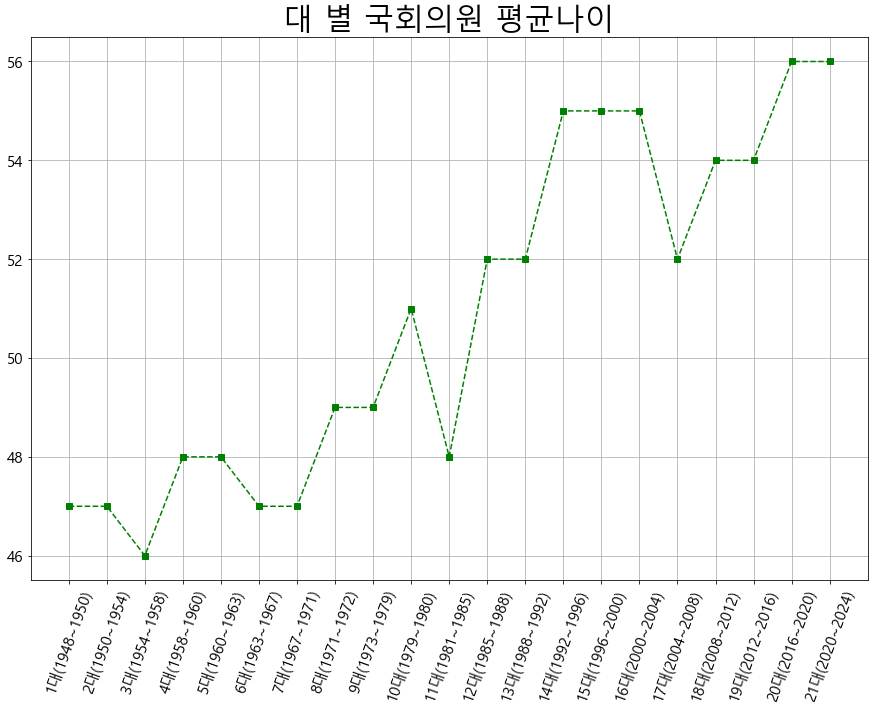

In [15]:
# 대 별 국회의원 평균나이 선 그래프
# 대 별 의원들의 평균나이가 점차 증가하는 것을 볼 때 국회가 점점더 고인다는 느낌을 받음.

plt.figure(figsize=(15,10))
plt.plot(df_age['대'],df_age['평균나이'],label="평균나이",linestyle='--',color='g',marker='s')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)
plt.grid(True)
plt.title('대 별 국회의원 평균나이',size=30)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text major ticklabel objects>)

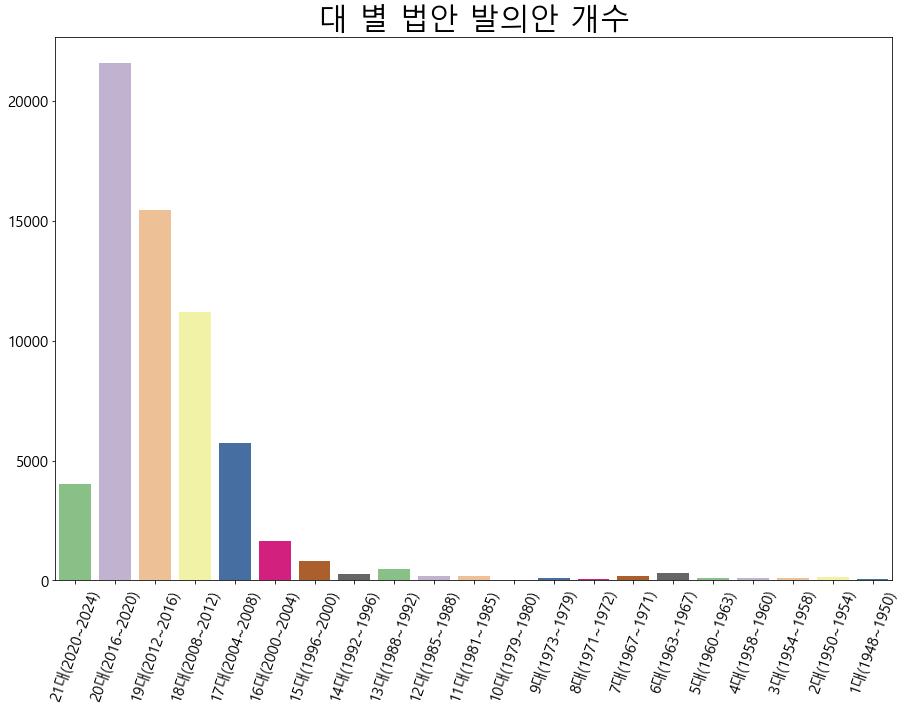

In [16]:
#대 별 법안 발의안 개수

plt.figure(figsize=(15,10))
sns.countplot(data = sg, x = 'year', palette = 'Accent')
plt.title('대 별 법안 발의안 개수',size=30)
plt.xlabel('')
plt.ylabel('')
plt.xticks(rotation = 70,size=15)
plt.yticks(size=15)

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 <a list of 11 Text major ticklabel objects>)

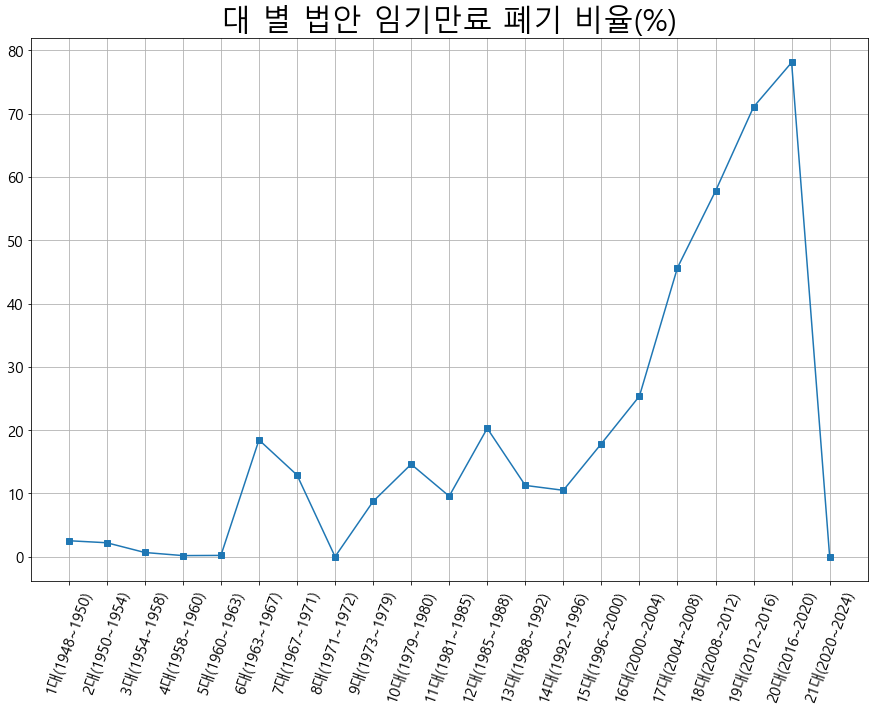

In [17]:
# 임기만료 폐기 비율만 추출
# 16대 국회 부터 법안 발의안 수가 급격히 증가했지만, 발의 법의안 처리 상태를 보면
# 그 시점 부터 임기만료폐기되는 법의안 수도 급격히 증가한다.
# 이를 토대로 쓸데 없이 발의 되는 법안이 많이 늘어났다는 것을 유추 할 수있다.

pc_rcount=pc.pivot_table(index=['year','PROC_RESULT_CD'],
                         values = 'BILL_NO', 
                         aggfunc='count')
list_임기만료=[]
for i in list_dae2:
    a = pc_rcount.loc[i,'임기만료폐기',:].values
    if len(a)==0:
        a=0
    b = pc_rcount.loc[i,:].values.sum()
    list_임기만료.append(round(float(a/b*100),2))
    
plt.figure(figsize=(15,10))
plt.plot(list_dae2,list_임기만료,marker='s')
plt.title('대 별 법안 임기만료 폐기 비율(%)',size=30)
plt.xticks(rotation = 70,size=15)
plt.grid(True)
plt.yticks(size=15)